In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Throw away content of message, only keep time and date and sender
def stripMessage(message):
    colonIndex = message.find(": ")
    dashIndex = message.find("-")
    try:
        result = (pd.to_datetime(message[:dashIndex-1],format='%d.%m.%y, %H:%M'), message[dashIndex+2:colonIndex])
        return result
    except:
        return False

#Read an archive file of conversation with name
def readWhatsAppFile(name):
    file = open('%s.txt'%name, mode='r', encoding='utf-8')
    data = {}
    for line in file.readlines():
        stripped = stripMessage(line)
        if stripped != False:
            date = stripped[0]
            sender = stripped[1]
            address = ""
            if sender == name:
                address = "Received"
            elif sender == "Robin":
                address = "Sent"
            else:
                continue
                
            data[date] = address
    file.close()
    return data

#Make DataFrame from name
def makeDataFrame(name):
    temp_data = readWhatsAppFile(name)
    temp_series = pd.Series(temp_data)
    temp_df = pd.DataFrame(temp_series)
    space = name.find(" ")
    if space != -1:
        temp_df.columns = [name[:space+1]]
    else:
        temp_df.columns = [name]
    return temp_df
    

In [3]:
girlfriend_df = makeDataFrame('girlfriend')

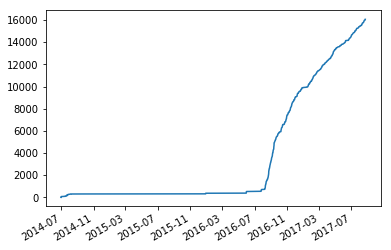

In [4]:
girlfriend_df.count(axis=1).cumsum().plot()

In [5]:
girlfriend_df.head()

,girlfriend
2014-06-30 19:37:00,Received
2014-06-30 19:38:00,Sent
2014-06-30 20:08:00,Received
2014-06-30 20:09:00,Received
2014-06-30 20:13:00,Sent


In [6]:
girlfriend_df.to_pickle("phone")

In [7]:
#Want: - a plot of what time of day most messages are sent and received
#      - a plot of what day of the week most messages are sent and received

girlfriend_df['Weekday'] = girlfriend_df.index.weekday #monday = 0, sunday = 6
dayOfWeek={0:'Montag', 1:'Dienstag', 2:'Mittwoch', 3:'Donnerstag', 4:'Freitag', 5:'Samstag', 6:'Sonntag'}
girlfriend_df['WeekdayNamed'] = girlfriend_df['Weekday'].map(dayOfWeek)

girlfriend_sent = girlfriend_df.loc[girlfriend_df['girlfriend'] == 'Sent']
girlfriend_rec = girlfriend_df.loc[girlfriend_df['girlfriend'] == 'Received']

daily_sent_count = []
daily_rec_count = []
for day in range(0,7):
    daily_sent_count.append((girlfriend_sent['Weekday'] == day).sum())
    daily_rec_count.append((girlfriend_rec['Weekday'] == day).sum())

In [8]:
hourly_sent = girlfriend_sent.girlfriend.groupby(girlfriend_sent.index.hour).count()
hourly_rec = girlfriend_rec.girlfriend.groupby(girlfriend_rec.index.hour).count()

In [9]:
print("Daily SENT")
print(daily_sent_count)
print("Daily RECEIVED")
print(daily_rec_count)
print("Hourly SENT")
print(hourly_sent)
print("HOURLY RECEIVED")
print(hourly_rec)

Daily SENT
[1343, 1426, 1175, 1358, 1222, 952, 1010]
Daily RECEIVED
[1191, 1224, 1068, 1195, 1056, 823, 1018]
Hourly SENT
0     428
1     235
2     103
3      83
4       7
5      13
6     107
7     151
8     286
9     401
10    375
11    452
12    402
13    503
14    460
15    419
16    425
17    401
18    482
19    447
20    496
21    503
22    576
23    731
Name: girlfriend, dtype: int64
HOURLY RECEIVED
0     373
1     168
2      94
3     109
4       9
5      11
6     107
7     149
8     288
9     307
10    344
11    390
12    350
13    396
14    364
15    378
16    327
17    331
18    446
19    442
20    471
21    463
22    592
23    666
Name: girlfriend, dtype: int64


In [10]:
def make_clock_plot(arr1, arr2, label1, label2, color1, color2):
    N = 24
    bottom = 0

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    # make the histogram
    #radii, tick = np.histogram(np.array(arr), bins = np.arange(24))
    #print(radii)
    # width of each bin on the plot
    width = (2*np.pi) / N

    # make a polar plot
    plt.figure(figsize = (10, 10))
    ax = plt.subplot(111, polar=True)
    bars1 = ax.bar(theta, np.array(arr1), width=2/3*width, bottom=bottom, color=color1, alpha=1)
    bars2 = ax.bar(theta, np.array(arr2), width=width, bottom=bottom, color=color2, alpha=0.6)

    # set the label go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
    ax.set_xticklabels(ticks)
    ax.legend([label1, label2])
    ax.grid(linewidth=0.5, which="both", linestyle="--")
    plt.show()

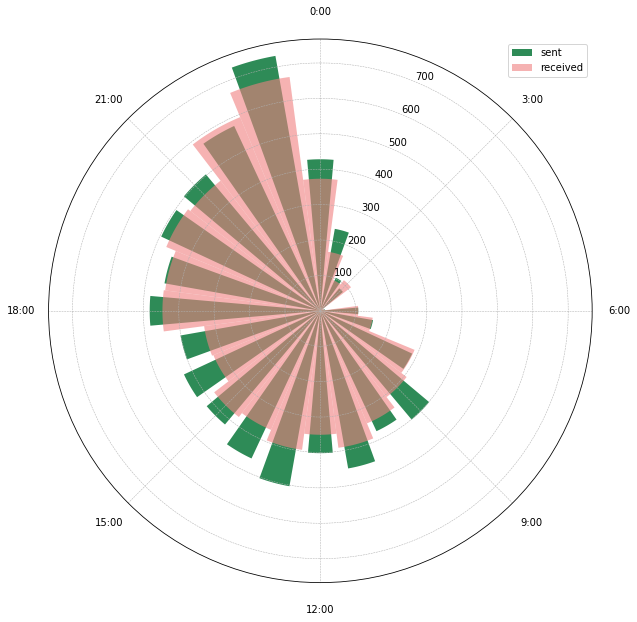

In [11]:
make_clock_plot(arr1=hourly_sent, arr2=hourly_rec, label1="sent", label2="received", color1="seagreen", color2="lightcoral")

In [12]:
def make_daily_plot(arr1, arr2, label1, label2, color1, color2):

    # create theta for 7 days
    days = np.arange(7)

    # make a plot
    plt.figure(figsize = (15, 10))
    ax = plt.subplot(111)
    bars1 = ax.bar(days+1/5, np.array(arr1), width=1/3, color=color1)
    bars2 = ax.bar(days-1/5, np.array(arr2), width=1/3, color=color2)


    # set the label
    ticks = ['0', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax.set_xticklabels(ticks)
    ax.legend([label1, label2])
    ax.grid(linewidth=0.5, linestyle="--")

    plt.show()

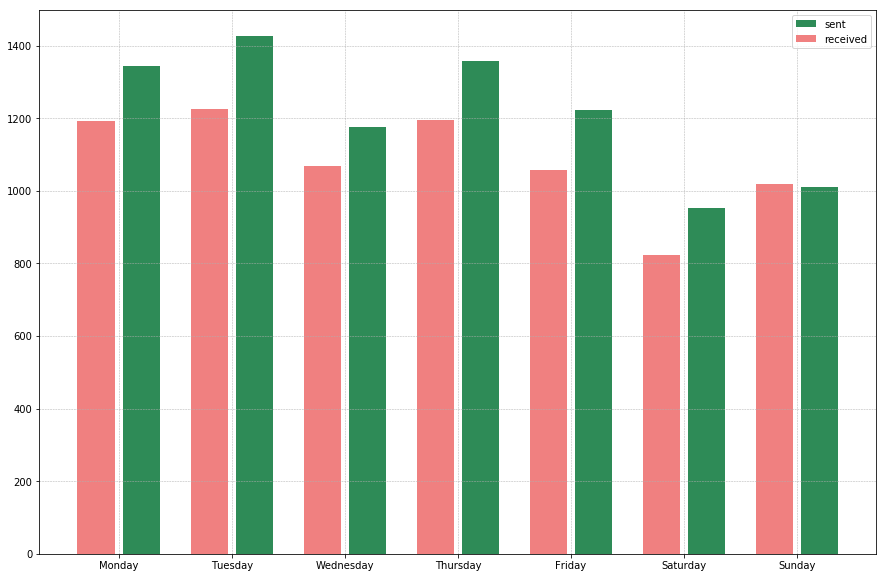

In [13]:
make_daily_plot(arr1=daily_sent_count, label1="sent", color1="seagreen", arr2=daily_rec_count, label2="received", color2="lightcoral")